## Feature importance

### Relevant imports and data load

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor

from scipy import stats

%matplotlib inline

In [15]:
# load data which is stored in the /data folder of the project
train_data = pd.read_csv('../data/train_filled_up.csv', sep=',', header=0)

In [16]:
train_data.head(3)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,...,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,706.0,0.0,...,0,1,0,0,0,0,1,0,0,208500
1,2,20,80.0,9600,6,8,1976,1976,978.0,0.0,...,0,1,0,0,0,0,1,0,0,181500
2,3,60,68.0,11250,7,5,2001,2002,486.0,0.0,...,0,1,0,0,0,0,1,0,0,223500


### Analyze correlation of pure numeric features

In [17]:
num_values = train_data.loc[:,('LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',\
                           '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',\
                           'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',\
                           'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',\
                           'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice')]

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5]),
 <a list of 14 Text yticklabel objects>)

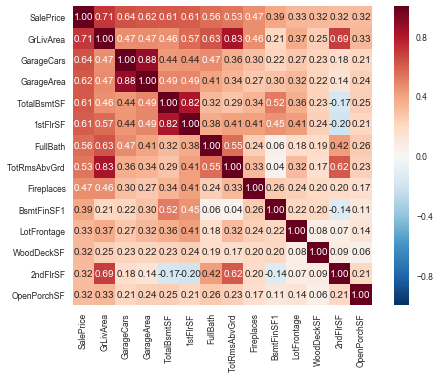

In [18]:
corrmat = num_values.corr()
k=14
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(num_values[cols].values.T)
sns.set(font_scale=0.85)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
            annot_kws={'size': 10}, yticklabels=cols.values,
            xticklabels=cols.values)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

### analyze feature importance of features that are numeric, or coded numerically

In [19]:
numeric_features = train_data.select_dtypes(include=[np.number])

In [20]:
corr = numeric_features.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.791069
GrLivArea      0.708618
GarageCars     0.640473
GarageArea     0.623423
Name: SalePrice, dtype: float64 

KitchenQual_nan     NaN
Functional_nan      NaN
PavedDrive_nan      NaN
SaleType_nan        NaN
SaleCondition_nan   NaN
Name: SalePrice, dtype: float64


(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5]),
 <a list of 14 Text yticklabel objects>)

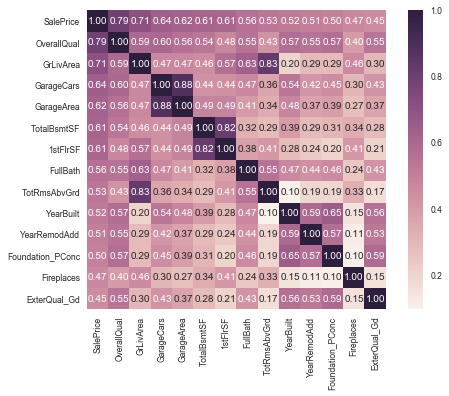

In [21]:
corrmat = numeric_features.corr()
k=14
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(numeric_features[cols].values.T)
sns.set(font_scale=0.85)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
            annot_kws={'size': 10}, yticklabels=cols.values,
            xticklabels=cols.values)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

### Feature importance based on simple random forest

In [ ]:
target_variable = train_data["SalePrice"]
features = train_data.drop(["Id", "SalePrice"], axis=1)

                     names  importances
3              OverallQual     0.593213
14               GrLivArea     0.122696
10             TotalBsmtSF     0.034608
12                2ndFlrSF     0.028282
24              GarageArea     0.025521
7               BsmtFinSF1     0.025309
11                1stFlrSF     0.019191
23              GarageCars     0.012680
5                YearBuilt     0.012635
21            TotRmsAbvGrd     0.011054
2                  LotArea     0.010631
1              LotFrontage     0.010539
25              WoodDeckSF     0.008077
6             YearRemodAdd     0.006531
26             OpenPorchSF     0.006082
209           CentralAir_Y     0.004823
4              OverallCond     0.004722
32                  MoSold     0.004434
9                BsmtUnfSF     0.004401
22              Fireplaces     0.002932
231      GarageType_Detchd     0.002647
37             MSZoning_RM     0.002283
29             ScreenPorch     0.002100
227      GarageType_Attchd     0.001897


(-1, 88.0)

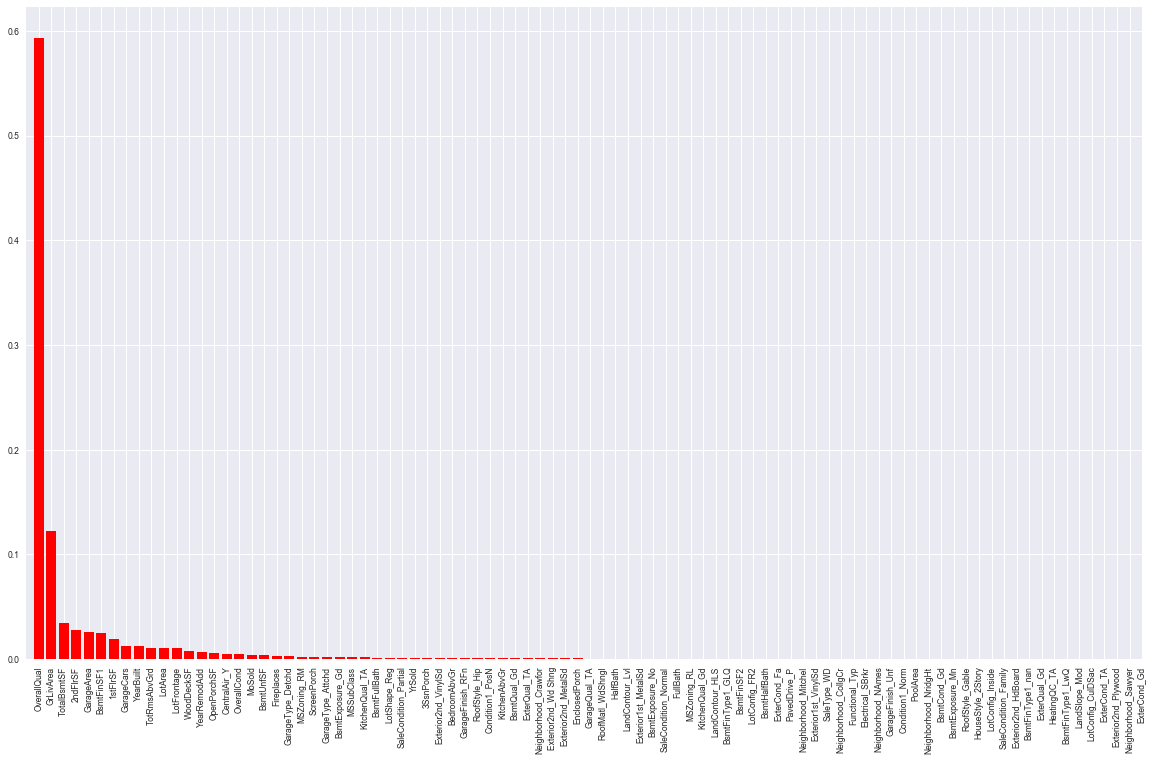

In [24]:
feature_names = features.columns

# no text allowed anymore
clf = RandomForestRegressor()
clf.fit(features, target_variable)

importances = clf.feature_importances_
d = {'names': feature_names, 'importances': importances}

df = pd.DataFrame(d, columns=['names', 'importances'])
df = df.sort_values(by='importances', ascending=False)

print(df)

plt.figure(figsize=(20, 12))
plt.bar(range(features.shape[1]), df['importances'],
        color='r', align='center')
plt.xticks(range(features.shape[1]),
           df['names'], rotation=90)
plt.xlim([-1, features.shape[1]/3])

OverallQual seams to strongly impact model performance. permuting it decreases model performance by ~59%.
GrLivArea can also be seen as strong impact. Rest of features are below 10%. My assumption would be, that only 50% and above would be 'really relevant'

Set all features, that have an importance value between 0 and 10% and aren't rated regarding importance yet to medium. 